## Case Study6 DS7333 
### Business Understanding
This case study is for a superconductor client and the goal of the study is to predict the existence of a new particle. The data is huge and we need to build a dense Neural Network and a classifier for it to accurately detect the particle.

In [98]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

### Data Evaluation

In [2]:
raw_data= "/Users/lijjumathew/Downloads/all_train.csv"

In [3]:
# Takes long time. Dont run.
df_full_data = pd.read_csv(raw_data)
df_full_data.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [4]:
df_full_data['# label'].value_counts(normalize=False)

1.0    3500879
0.0    3499121
Name: # label, dtype: int64

In [37]:
n = sum(1 for line in open(raw_data))- 1
s = n//70
print("The total number of records :", n)
print("The number of sub sample records :", s)
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df_sub_sample_data = pd.read_csv(raw_data, skiprows=skip)

The total number of records : 7000000
The number of sub sample records : 100000


In [38]:
df_sub_sample_data.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500010,0.017590,-0.003045,-0.000968,0.008303,-0.002933,0.005577,0.018410,-0.001198,-0.000347,...,0.016980,-0.000987,-0.002145,0.002206,0.010476,0.012370,0.004668,0.002208,0.015489,1000.327494
std,0.500002,1.004261,0.997678,0.999582,0.995735,0.997452,1.004138,0.987727,0.994891,1.001856,...,1.002778,0.999720,0.998036,1.001291,1.009841,1.006573,1.005258,0.986897,0.979727,353.509934
min,0.000000,-1.960467,-2.364295,-1.732154,-7.765492,-1.732137,-1.054221,-2.684351,-2.757403,-1.732348,...,-1.728263,-2.281372,-1.731708,-0.573682,-3.450370,-3.070665,-10.665773,-2.045494,-2.274026,499.999969
25%,0.000000,-0.729855,-0.738150,-0.868205,-0.615766,-0.863709,-1.054221,-0.756792,-0.702358,-0.871377,...,-0.735034,-0.720865,-0.866189,-0.573682,-0.541917,-0.511280,-0.354546,-0.693157,-0.789595,750.000000
50%,1.000000,-0.039069,-0.001882,-0.000029,0.016943,-0.007991,-0.005984,-0.151617,-0.001330,0.003074,...,-0.084914,0.001148,-0.005979,-0.573682,-0.162089,-0.313666,-0.326255,-0.353396,-0.088345,1000.000000
75%,1.000000,0.695118,0.730261,0.863716,0.682585,0.857235,0.850488,0.769357,0.699210,0.868356,...,0.643054,0.718270,0.858536,-0.573682,0.476364,0.164429,-0.233372,0.483806,0.762516,1250.000000
max,1.000000,3.813889,2.364814,1.732359,2.985345,1.731945,4.482618,3.438064,2.758075,1.731340,...,5.383161,2.281768,1.732734,1.743123,6.713394,8.500910,13.050698,4.480346,4.198739,1500.000000


In [39]:
df_sub_sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   # label  100000 non-null  float64
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   f3       100000 non-null  float64
 5   f4       100000 non-null  float64
 6   f5       100000 non-null  float64
 7   f6       100000 non-null  float64
 8   f7       100000 non-null  float64
 9   f8       100000 non-null  float64
 10  f9       100000 non-null  float64
 11  f10      100000 non-null  float64
 12  f11      100000 non-null  float64
 13  f12      100000 non-null  float64
 14  f13      100000 non-null  float64
 15  f14      100000 non-null  float64
 16  f15      100000 non-null  float64
 17  f16      100000 non-null  float64
 18  f17      100000 non-null  float64
 19  f18      100000 non-null  float64
 20  f19      100000 non-null  f

In [8]:
df_sub_sample_data['# label'].value_counts(normalize=False)

1.0    50033
0.0    49967
Name: # label, dtype: int64

In [9]:
df_sub_sample_data.isnull().sum()

# label    0
f0         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
mass       0
dtype: int64

In [10]:
df_sub_sample_data.duplicated().sum()

0

In [40]:
df_sub_sample_data['label'] = df_sub_sample_data['# label'].astype(int).astype('category')
df_sub_sample_data = df_sub_sample_data.drop('# label', 1)

/tmp/ipykernel_98683/1981076442.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_sub_sample_data = df_sub_sample_data.drop('# label', 1)


In [33]:
df_sub_sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   f0      100000 non-null  float64 
 1   f1      100000 non-null  float64 
 2   f2      100000 non-null  float64 
 3   f3      100000 non-null  float64 
 4   f4      100000 non-null  float64 
 5   f5      100000 non-null  float64 
 6   f6      100000 non-null  float64 
 7   f7      100000 non-null  float64 
 8   f8      100000 non-null  float64 
 9   f9      100000 non-null  float64 
 10  f10     100000 non-null  float64 
 11  f11     100000 non-null  float64 
 12  f12     100000 non-null  float64 
 13  f13     100000 non-null  float64 
 14  f14     100000 non-null  float64 
 15  f15     100000 non-null  float64 
 16  f16     100000 non-null  float64 
 17  f17     100000 non-null  float64 
 18  f18     100000 non-null  float64 
 19  f19     100000 non-null  float64 
 20  f20     100000 non-null  fl

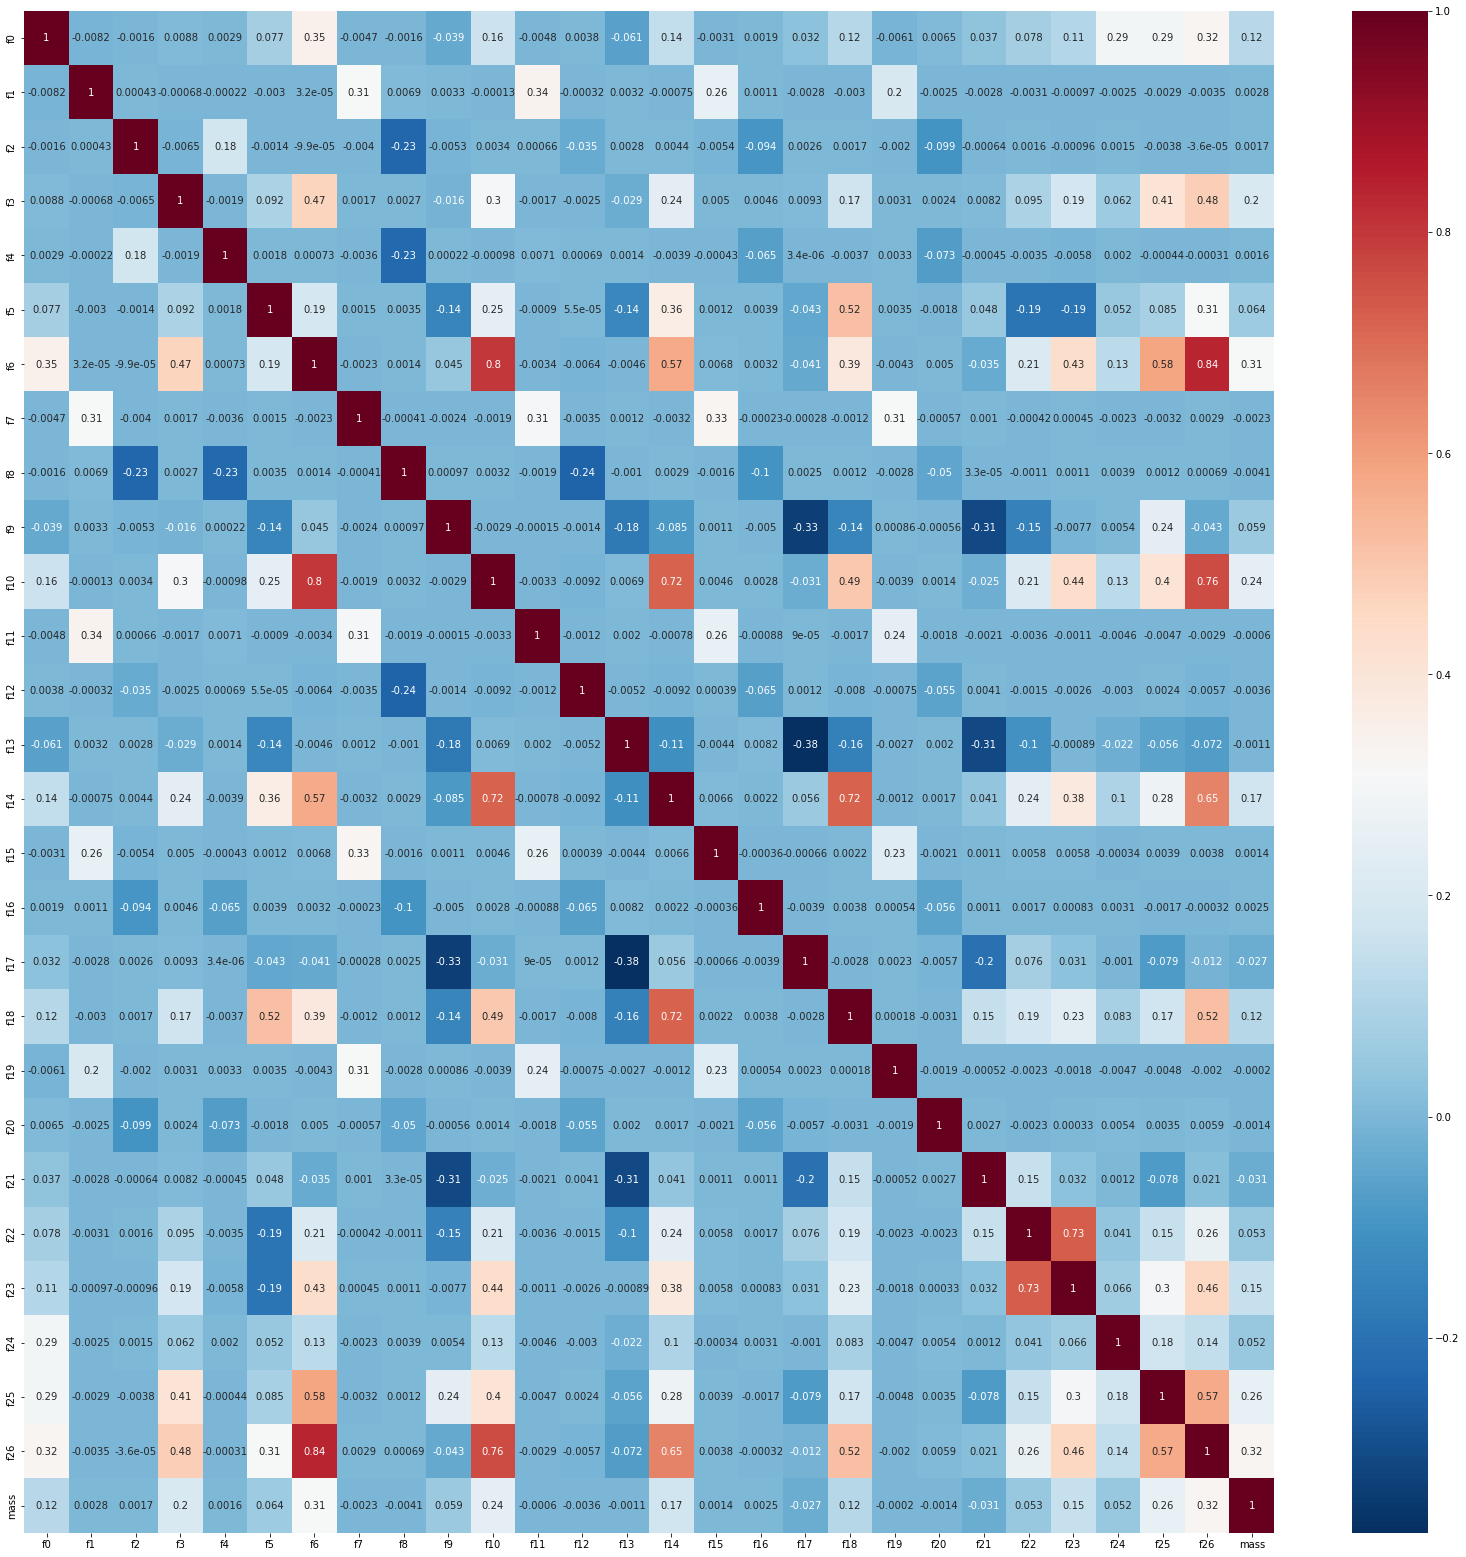

In [20]:
corrMatrix = df_sub_sample_data.corr()
plt.figure(figsize=(28,28))
#corrMatrix = corrMatrix[corrMatrix>= 0.75]
# corrMatrix = corrMatrix[corrMatrix<=<= -0.75]
sns.heatmap(corrMatrix, cmap='RdBu_r', annot=True)
plt.show()

### Data Evaluation Summary

* The dataset has 7 billion records and 28 features.
* The target variable is label and it is a binary variable.
* The dataset is a balanced dataset with even distribution of target variable.
* The dataset is sub sampled to 100,000 records and the dataset is balanced as well.
* There are no missing values.
* There are no duplicate records.
* Below variables have correlation with threshold [>=0.75 and <=-0.75]
    * f10 and f6
    * f26 and f6
    * f26 and f10

### Model Preparations

In [52]:
X = df_sub_sample_data.loc[:, df_sub_sample_data.columns != 'label'].values
y = df_sub_sample_data['label'].astype('category').cat.codes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Preparations Summary
* The dataset is split into 70:30.
* The target variable is already converted as categorical variable.
* The data is scaled with standard scaler.
* Since we have a balanced dataset, accuracy would be a good metric for model evaluation.

#### Basic Model

In [74]:
model1 = Sequential()
#First Hidden Layer
model1.add(Dense(4, activation='relu', kernel_initializer='random_normal',input_dim=28))
#Output Layer
model1.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
model1.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [75]:
#Fitting the data to the training dataset
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
history1 = model1.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)


Epoch 1/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.4248 - accuracy: 0.8029 - val_loss: 0.3321 - val_accuracy: 0.8391
Epoch 2/80
5600/5600 [==============================] - 6s 1ms/step - loss: 0.3339 - accuracy: 0.8398 - val_loss: 0.3270 - val_accuracy: 0.8388
Epoch 3/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3289 - accuracy: 0.8401 - val_loss: 0.3250 - val_accuracy: 0.8366
Epoch 4/80
5600/5600 [==============================] - 6s 1ms/step - loss: 0.3242 - accuracy: 0.8395 - val_loss: 0.3232 - val_accuracy: 0.8387
Epoch 5/80
5600/5600 [==============================] - 6s 1ms/step - loss: 0.3243 - accuracy: 0.8408 - val_loss: 0.3228 - val_accuracy: 0.8386
Epoch 6/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3209 - accuracy: 0.8422 - val_loss: 0.3213 - val_accuracy: 0.8391
Epoch 7/80
5600/5600 [==============================] - 6s 1ms/step - loss: 0.3175 - accuracy: 0.8424 - val_loss: 0.3205 - val_accuracy:

In [76]:
def get_learning_curve_loss(history):
    history_dict = history.history
    # Learning curve(Loss)
    # let's see the training and validation loss by epoch

    # loss
    loss_values = history_dict['loss'] # you can change this
    val_loss_values = history_dict['val_loss'] # you can also change this

    # range of X (no. of epochs)
    epochs = range(1, len(loss_values) + 1) 

    # plot
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [80]:
def get_learning_curve_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # range of X (no. of epochs)
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    # orange is for "orange"
    plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print('The highest accuracy is :',np.max(val_acc))

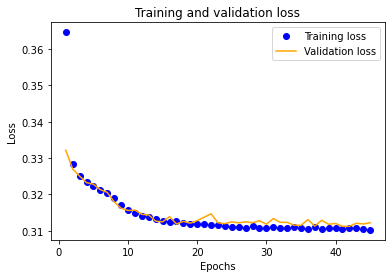

In [77]:
get_learning_curve_loss(history1)

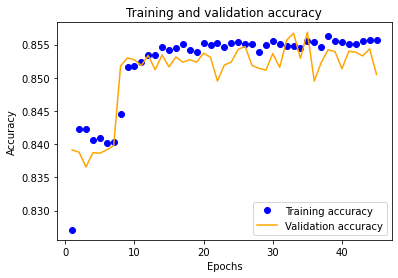

The highest accuracy is : 0.8568571209907532


In [81]:
get_learning_curve_accuracy(history1)

In [85]:
y_train_pred1 = np.round(model1.predict(X_train),0)
print("\n Classification Report \n",classification_report(y_train, y_train_pred1, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.885660  0.819473  0.851282     34992
           1   0.832097  0.894253  0.862056     35008

    accuracy                       0.856871     70000
   macro avg   0.858878  0.856863  0.856669     70000
weighted avg   0.858872  0.856871  0.856670     70000



In [86]:
y_test_pred1 = np.round(model1.predict(X_test),0)
print("\n Classification Report \n",classification_report(y_test, y_test_pred1, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.883791  0.816419  0.848770     15007
           1   0.829274  0.892550  0.859749     14993

    accuracy                       0.854467     30000
   macro avg   0.856533  0.854484  0.854260     30000
weighted avg   0.856546  0.854467  0.854257     30000



### Model 2 - Added more layers

In [87]:
model2 = Sequential()
#First Hidden Layer
model2.add(Dense(4, activation='relu', kernel_initializer='random_normal',input_dim=28))
#Second Hidden Layer
model2.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
model2.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
model2.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [88]:
history2 = model2.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/80
5600/5600 [==============================] - 5s 881us/step - loss: 0.4200 - accuracy: 0.8012 - val_loss: 0.3310 - val_accuracy: 0.8366
Epoch 2/80
5600/5600 [==============================] - 5s 861us/step - loss: 0.3268 - accuracy: 0.8439 - val_loss: 0.3268 - val_accuracy: 0.8386
Epoch 3/80
5600/5600 [==============================] - 5s 867us/step - loss: 0.3225 - accuracy: 0.8407 - val_loss: 0.3236 - val_accuracy: 0.8385
Epoch 4/80
5600/5600 [==============================] - 5s 880us/step - loss: 0.3221 - accuracy: 0.8399 - val_loss: 0.3242 - val_accuracy: 0.8359
Epoch 5/80
5600/5600 [==============================] - 5s 891us/step - loss: 0.3258 - accuracy: 0.8368 - val_loss: 0.3247 - val_accuracy: 0.8364
Epoch 6/80
5600/5600 [==============================] - 5s 885us/step - loss: 0.3204 - accuracy: 0.8385 - val_loss: 0.3226 - val_accuracy: 0.8371
Epoch 7/80
5600/5600 [==============================] - 5s 896us/step - loss: 0.3166 - accuracy: 0.8393 - val_loss: 0.3231 -

In [89]:
y_train_pred2 = np.round(model2.predict(X_train),0)
print("\n Classification Report \n",classification_report(y_train, y_train_pred2, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.882409  0.821131  0.850668     34992
           1   0.832817  0.890625  0.860751     35008

    accuracy                       0.855886     70000
   macro avg   0.857613  0.855878  0.855710     70000
weighted avg   0.857607  0.855886  0.855711     70000



In [90]:
y_test_pred2 = np.round(model1.predict(X_test),0)
print("\n Classification Report \n",classification_report(y_test, y_test_pred2, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.883791  0.816419  0.848770     15007
           1   0.829274  0.892550  0.859749     14993

    accuracy                       0.854467     30000
   macro avg   0.856533  0.854484  0.854260     30000
weighted avg   0.856546  0.854467  0.854257     30000



### Model3 - Added drop out layers.

In [91]:
model3 = Sequential()
#First Hidden Layer
model3.add(Dense(4, activation='relu', kernel_initializer='random_normal',input_dim=28))
model3.add(Dropout(rate = 0.1))
#Second Hidden Layer
model3.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
model3.add(Dropout(rate = 0.1))
#Output Layer
model3.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
model3.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [92]:
history3 = model3.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.4302 - accuracy: 0.7992 - val_loss: 0.3335 - val_accuracy: 0.8398
Epoch 2/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3569 - accuracy: 0.8327 - val_loss: 0.3300 - val_accuracy: 0.8389
Epoch 3/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.3498 - accuracy: 0.8339 - val_loss: 0.3286 - val_accuracy: 0.8374
Epoch 4/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3501 - accuracy: 0.8274 - val_loss: 0.3229 - val_accuracy: 0.8420
Epoch 5/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3500 - accuracy: 0.8311 - val_loss: 0.3224 - val_accuracy: 0.8424
Epoch 6/80
5600/5600 [==============================] - 9s 2ms/step - loss: 0.3429 - accuracy: 0.8354 - val_loss: 0.3195 - val_accuracy: 0.8449
Epoch 7/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.3462 - accuracy: 0.8302 - val_loss: 0.3188 - val_accuracy:

In [93]:
y_train_pred3 = np.round(model3.predict(X_train),0)
print("\n Classification Report \n",classification_report(y_train, y_train_pred3, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.886884  0.813357  0.848531     34992
           1   0.827719  0.896309  0.860650     35008

    accuracy                       0.854843     70000
   macro avg   0.857302  0.854833  0.854590     70000
weighted avg   0.857295  0.854843  0.854592     70000



In [94]:
y_test_pred3 = np.round(model1.predict(X_test),0)
print("\n Classification Report \n",classification_report(y_test, y_test_pred3, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.883791  0.816419  0.848770     15007
           1   0.829274  0.892550  0.859749     14993

    accuracy                       0.854467     30000
   macro avg   0.856533  0.854484  0.854260     30000
weighted avg   0.856546  0.854467  0.854257     30000



### Model Summary
* We started of with a basic model with 1 hidden layer. Early stopping is implemented and the loss function used is binary entropy since it is a binary classification.
* The first model had 85% accuracy and good recall as well.
* For the second model, an another layer was added. The accuracy and other metrics were pretty much the same as first model.
* For the third model, a drop out layer was added to reduce any over fitting and the accuracy and other metrics were same as other models.

Below are the model metrics

| Sno | Model                                                                        | Train/Test | Target | Accuracy | Precision | Recall | F-Score | 
|-----|-------------------------------------------------------------------------------------------|--------|----------|-----------|--------|---------| 
| 1   | NN Model(1 Hidden Layer)                                                     | Train      |  0     | 0.85     | 0.88      | 0.81   | 0.85    | 
|     |                                                                              |            |  1     |          | 0.83      | 0.89   | 0.86    |
|     |                                                                              | Test       |  0     | 0.85     | 0.88      | 0.81   | 0.84    |
|     |                                                                              |            |  1     |          | 0.82      | 0.89   | 0.85    |
| 2   | NN Model(2 Hidden Layer)                                                     | Train      |  0     | 0.85     | 0.88      | 0.82   | 0.85    |
|     |                                                                              |            |  1     |          | 0.83      | 0.89   | 0.86    |
|     |                                                                              | Test       |  0     | 0.85     | 0.85      | 0.81   | 0.84    |
|     |                                                                              |            |  1     |          | 0.82      | 0.89   | 0.85    |
| 3   | NN Model(2 Hidden Layer with drop out Layers)                                | Train      |  0     | 0.85     | 0.88      | 0.81   | 0.84    |
|     |                                                                              |            |  1     |          | 0.82      | 0.89   | 0.86    |
|     |                                                                              | Test       |  0     | 0.85     | 0.88      | 0.81   | 0.84    |
|     |                                                                              |            |  1     |          | 0.82      | 0.89   | 0.85    |                           